# Week 3

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

## Today

This lecture covers:

1. **A short intro lecture**: A video covering key concepts like metadata, Simpson's paradox, and exploratory vs. explanatory analysis.
2. **Conditional plots**: We'll combine crime categories with police district data to uncover geographic patterns — and see how those patterns change over time.
3. **Why visualization matters**: Through a famous example, you'll see why summary statistics alone can be dangerously misleading.
4. **Fundamentals of data visualization**: A deeper dive into visualization theory — histograms, CDFs, KDEs, and more.
5. **Hands-on visualization**: You'll recreate classic plot types (jitter plots, histograms, KDEs, probability plots, box plots) using the SF crime data.

## Part 1: A little intro lecture

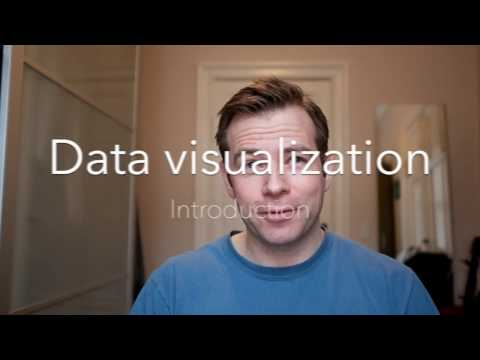

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('9D2aI30AMhM', width=800, height=450)

> *Exercise 1.1:* Questions for the lecture. 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * In the video I argue that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line. Now think about the SF crime data: could Simpson's paradox show up there? Come up with an example.
> * In your own words, explain the difference between *exploratory* and *explanatory* data analysis. Think about the plots you made in Weeks 1 and 2. They were exploratory ... we were trying to understand the dataset. But could they also be explanatory? Which ones would you highlight if you were trying to explain the dataset so someone who wasn't taking the course? Which ones did not give you any information? (I'm not asking you to answer those questions in great detail, I just want you to think through your work and start your brains processing ... pretty soon you WILL have to choose which plots are most useful to explain aspects of the data.)
>

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Answer in your own words based on the video, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to refine your writing (although, TBH I prefer that you don't ... reading too much LLM text feels generic and boring). 
</div>

## Part 2: The power of conditional plots

We continue working with the merged crime dataset you built in Week 2. The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.1:* The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about the police district and crime category columns to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most total crimes? Which has the most of your Personal Focus Crimes (from Week 2)?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> See if you can do this on your own — the calculations are fairly simple. If you get stuck, ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own — that's how you get familiar with how the Python Libraries actually works.
</div>


In [5]:
import pandas as pd
df = pd.read_csv('merged_incidents.csv')


<Axes: title={'center': 'Incidents by Police District'}, xlabel='Police District', ylabel='Number of Incidents'>

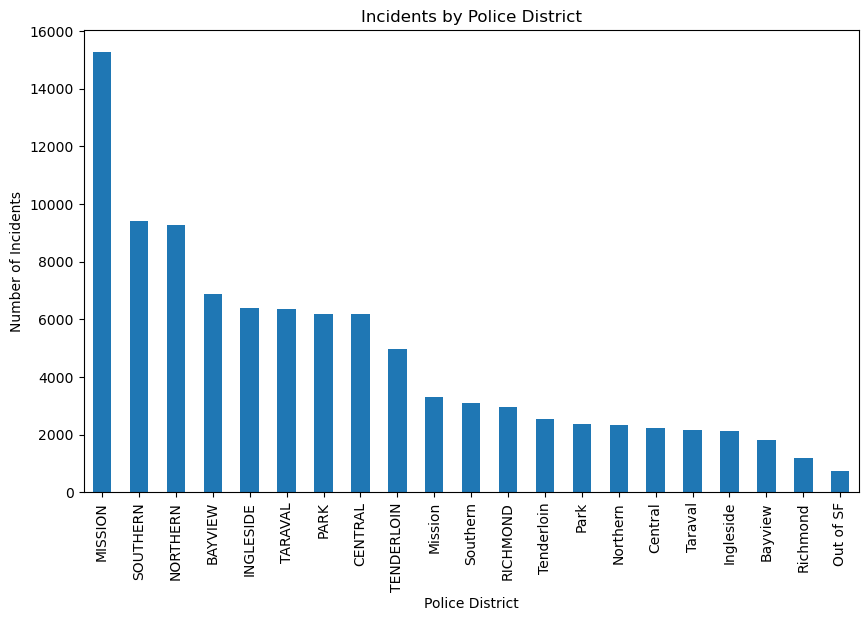

In [9]:
df['Police District'].value_counts().plot(kind='bar', title='Incidents by Police District', xlabel='Police District', ylabel='Number of Incidents', figsize=(10, 6))

>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for your Personal Focus Crimes. 
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia (or from your LLM's description of those neighborhoods)?
>    - Was there a district whose crime profile surprised you — one that didn't match your expectations? What did you expect, and what did the data show?
>    - Do any of your ratios look suspiciously extreme? What happens to the ratio for a rare crime in a small district? How many incidents would you want before trusting the ratio?
>    - The ratios tell you the *shape* of each district's crime profile, but not the *scale*. Pick the district with the lowest total crime count — is its ratio plot noisier than the others? What does this tell you about interpreting ratios without also considering volume?
>    - What neighborhood would you prefer to live in? Explain why?
>    - BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('merged_incidents.csv')

personal_focus_crimes =[
    'human trafficking (a), commercial sex acts', 
    'human trafficking (b), involuntary servitude',
    'missing person',
    'kidnapping',
    'prostitution'      
]

print(df['Incident Category'].value_counts())

# Step 1: Calculate P(crime) - overall probability of each crime type
total_incidents = len(df)
crime_counts = df['Incident Category'].value_counts()
p_crime = crime_counts / total_incidents

print("Overall crime probabilities P(crime):")
print(p_crime.head(10))
print()

# Step 2: Calculate P(crime|district) for each district
districts = df['Police District'].unique()
districts = [d for d in districts if pd.notna(d)]  # Remove any NaN districts

# Create a dictionary to store probabilities for each district
p_crime_given_district = {}

for district in districts:
    district_data = df[df['Police District'] == district]
    district_total = len(district_data)
    district_crime_counts = district_data['Incident Category'].value_counts()
    p_crime_given_district[district] = district_crime_counts / district_total

# Step 3: Calculate the ratio P(crime|district) / P(crime)
ratios = {}

for district in districts:
    ratios[district] = {}
    for crime in personal_focus_crimes:
        if crime in p_crime_given_district[district].index and crime in p_crime.index:
            ratios[district][crime] = p_crime_given_district[district][crime] / p_crime[crime]
        else:
            ratios[district][crime] = 0  # If crime doesn't exist in district

# Convert to DataFrame for easier plotting
ratios_df = pd.DataFrame(ratios).T

print("Ratio P(crime|district) / P(crime):")
print(ratios_df)
print()
print("Interpretation:")
print("- Ratio = 1: Crime occurs at the same rate as citywide average")
print("- Ratio > 1: Crime occurs MORE frequently in this district")
print("- Ratio < 1: Crime occurs LESS frequently in this district")

Incident Category
missing person                                  66952
prostitution                                    17551
sex offenses, forcible                           8747
kidnapping                                       4282
human trafficking (a), commercial sex acts        123
sex offenses, non forcible                         43
human trafficking (b), involuntary servitude        3
Name: count, dtype: int64
Overall crime probabilities P(crime):
Incident Category
missing person                                  0.685274
prostitution                                    0.179640
sex offenses, forcible                          0.089528
kidnapping                                      0.043828
human trafficking (a), commercial sex acts      0.001259
sex offenses, non forcible                      0.000440
human trafficking (b), involuntary servitude    0.000031
Name: count, dtype: float64

Ratio P(crime|district) / P(crime):
            human trafficking (a), commercial sex acts  \


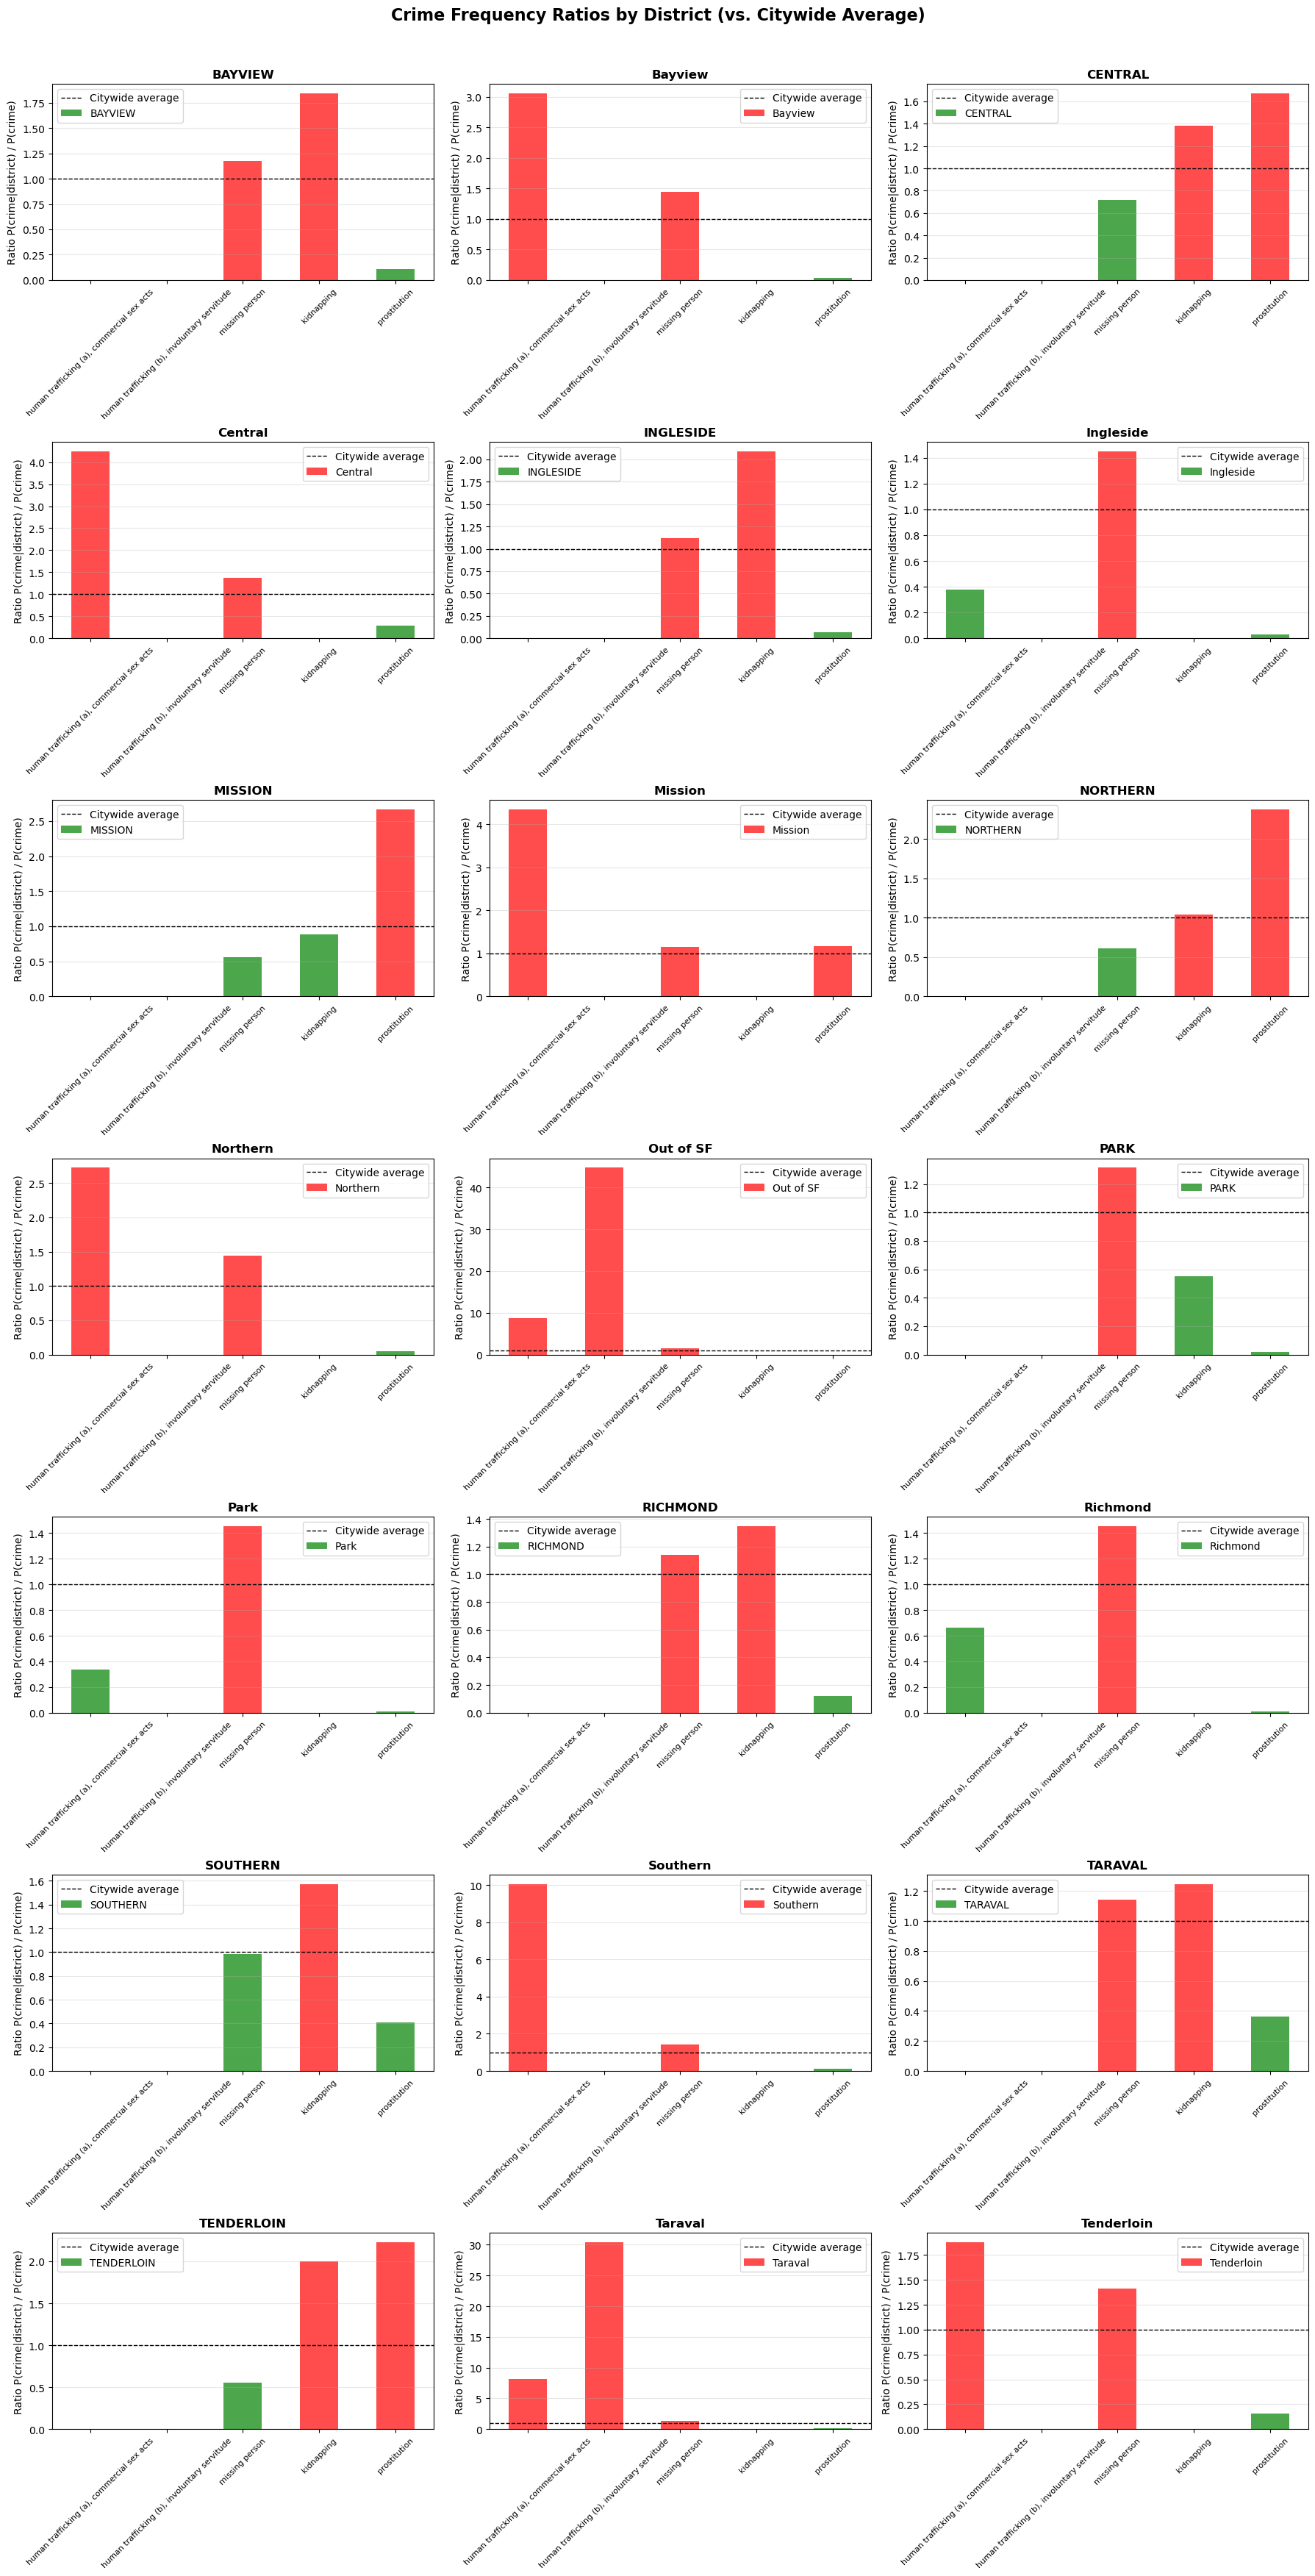


Interpretation Guide:
- Green bars (ratio < 1): Crime is LESS common in this district than citywide
- Red bars (ratio > 1): Crime is MORE common in this district than citywide
- Black dashed line: Citywide average (ratio = 1)


In [11]:
# Step 4: Create visualizations - Plot ratios for each district
import matplotlib.pyplot as plt

# Determine number of subplots needed
n_districts = len(districts)
n_cols = 3
n_rows = (n_districts + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_districts > 1 else [axes]

for idx, district in enumerate(sorted(districts)):
    ax = axes[idx]
    
    # Get ratios for this district
    district_ratios = ratios_df.loc[district, personal_focus_crimes]
    
    # Create bar plot
    colors = ['green' if r < 1 else 'red' for r in district_ratios]
    district_ratios.plot(kind='bar', ax=ax, color=colors, alpha=0.7)
    
    # Add horizontal line at y=1 (citywide average)
    ax.axhline(y=1, color='black', linestyle='--', linewidth=1, label='Citywide average')
    
    ax.set_title(f'{district}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Ratio P(crime|district) / P(crime)')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', alpha=0.3)
    ax.legend()

# Hide unused subplots
for idx in range(n_districts, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Crime Frequency Ratios by District (vs. Citywide Average)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.subplots_adjust(top=0.97)
plt.show()

print("\nInterpretation Guide:")
print("- Green bars (ratio < 1): Crime is LESS common in this district than citywide")
print("- Red bars (ratio > 1): Crime is MORE common in this district than citywide")
print("- Black dashed line: Citywide average (ratio = 1)")

In [12]:
# Step 5: Analyze specific districts and answer analytical questions

# 5.1: Look at specific districts of interest
districts_of_interest = ['Tenderloin', 'Mission', 'Richmond']

print("=" * 80)
print("ANALYSIS OF SPECIFIC DISTRICTS")
print("=" * 80)

for district in districts_of_interest:
    if district in ratios_df.index:
        print(f"\n{district.upper()}:")
        print("-" * 40)
        district_ratios = ratios_df.loc[district, personal_focus_crimes].sort_values(ascending=False)
        print(district_ratios)
        
        # Highlight top 3 crime types
        top_3 = district_ratios.head(3)
        print(f"\nTop 3 crimes in {district}:")
        for crime, ratio in top_3.items():
            pct = (ratio - 1) * 100
            print(f"  - {crime}: {ratio:.2f}x citywide rate ({pct:+.1f}%)")
    else:
        print(f"\n{district} not found in dataset. Available districts:")
        print(ratios_df.index.tolist())

# 5.2: Find districts with extreme ratios
print("\n" + "=" * 80)
print("EXTREME RATIOS (potential data quality issues)")
print("=" * 80)

extreme_threshold = 3.0  # Flag ratios above 3x or below 0.33x
for district in ratios_df.index:
    extreme_ratios = ratios_df.loc[district][
        (ratios_df.loc[district] > extreme_threshold) | 
        (ratios_df.loc[district] < 1/extreme_threshold)
    ]
    if len(extreme_ratios) > 0:
        print(f"\n{district}:")
        for crime, ratio in extreme_ratios.items():
            # Check incident count for this crime in this district
            incident_count = len(df[(df['Police District'] == district) & 
                                   (df['Incident Category'] == crime)])
            print(f"  - {crime}: {ratio:.2f}x (based on {incident_count} incidents)")

# 5.3: Find district with lowest total crime count
print("\n" + "=" * 80)
print("DISTRICT CRIME VOLUMES")
print("=" * 80)

district_totals = df['Police District'].value_counts().sort_values()
print("\nTotal crimes by district (ascending):")
print(district_totals)

lowest_crime_district = district_totals.index[0]
print(f"\n⚠️  {lowest_crime_district} has the LOWEST total crime count ({district_totals.iloc[0]} incidents)")
print("   This district's ratios may be noisier due to smaller sample size.")

ANALYSIS OF SPECIFIC DISTRICTS

TENDERLOIN:
----------------------------------------
human trafficking (a), commercial sex acts      1.878558
missing person                                  1.414979
prostitution                                    0.155788
human trafficking (b), involuntary servitude    0.000000
kidnapping                                      0.000000
Name: Tenderloin, dtype: float64

Top 3 crimes in Tenderloin:
  - human trafficking (a), commercial sex acts: 1.88x citywide rate (+87.9%)
  - missing person: 1.41x citywide rate (+41.5%)
  - prostitution: 0.16x citywide rate (-84.4%)

MISSION:
----------------------------------------
human trafficking (a), commercial sex acts      4.343167
prostitution                                    1.171846
missing person                                  1.144099
human trafficking (b), involuntary servitude    0.000000
kidnapping                                      0.000000
Name: Mission, dtype: float64

Top 3 crimes in Mission:
  -

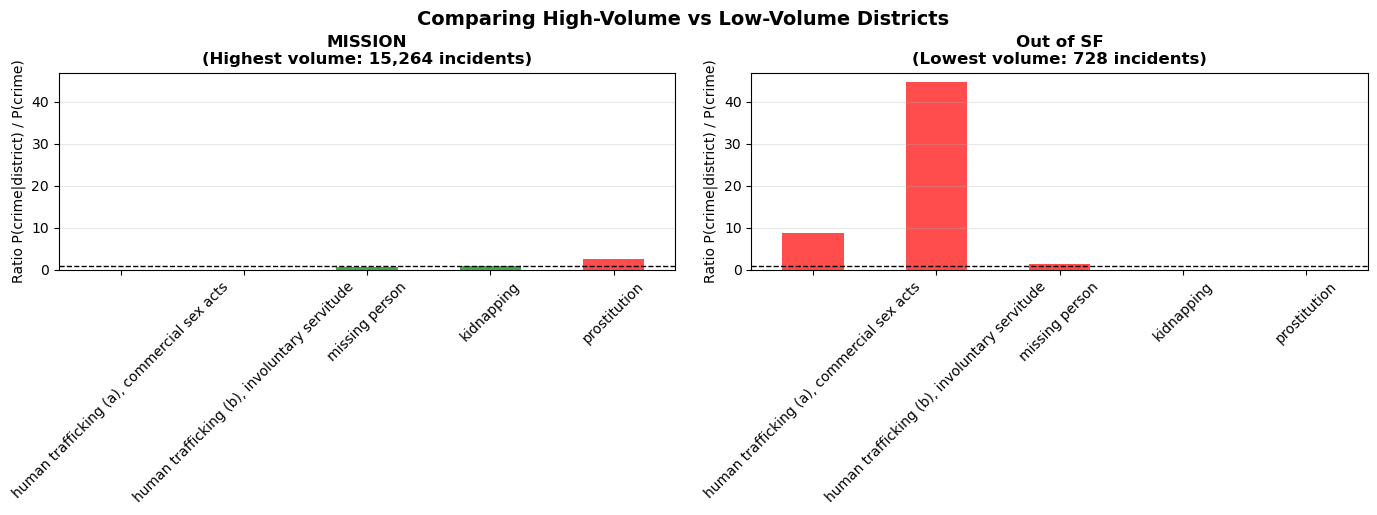


📊 OBSERVATION:
Compare the variability in ratios between MISSION and Out of SF.
The low-volume district typically shows more extreme ratios due to smaller sample sizes.

Rule of thumb: You probably want at least 30-50 incidents before trusting a ratio.


In [13]:
# Step 6: Compare high-volume vs low-volume district (illustrating noise)

# Find highest and lowest volume districts
district_totals = df['Police District'].value_counts()
highest_crime_district = district_totals.index[0]
lowest_crime_district = district_totals.index[-1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot highest volume district
ax1 = axes[0]
high_ratios = ratios_df.loc[highest_crime_district, personal_focus_crimes]
colors = ['green' if r < 1 else 'red' for r in high_ratios]
high_ratios.plot(kind='bar', ax=ax1, color=colors, alpha=0.7)
ax1.axhline(y=1, color='black', linestyle='--', linewidth=1)
ax1.set_title(f'{highest_crime_district}\n(Highest volume: {district_totals[highest_crime_district]:,} incidents)', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Ratio P(crime|district) / P(crime)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot lowest volume district
ax2 = axes[1]
low_ratios = ratios_df.loc[lowest_crime_district, personal_focus_crimes]
colors = ['green' if r < 1 else 'red' for r in low_ratios]
low_ratios.plot(kind='bar', ax=ax2, color=colors, alpha=0.7)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)
ax2.set_title(f'{lowest_crime_district}\n(Lowest volume: {district_totals[lowest_crime_district]:,} incidents)', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Ratio P(crime|district) / P(crime)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Set same y-axis limits for comparison
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.suptitle('Comparing High-Volume vs Low-Volume Districts', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\n📊 OBSERVATION:")
print(f"Compare the variability in ratios between {highest_crime_district} and {lowest_crime_district}.")
print(f"The low-volume district typically shows more extreme ratios due to smaller sample sizes.")
print(f"\nRule of thumb: You probably want at least 30-50 incidents before trusting a ratio.")

> *Exercise 2.2:* How do crime patterns across districts change over time?
>
> In Exercise 2.1 you computed `P(crime|district)/P(crime)` across the entire dataset. But San Francisco has changed a lot between 2003 and 2025. Have the crime profiles of its neighborhoods changed too?
>
> * Split your merged dataset into two periods: **early** (2003–2008) and **late** (2020–2025). Recompute the `P(crime|district)/P(crime)` ratios for each period separately.
> * Create a side-by-side visualization: for each district, show the ratios from the early period next to the ratios from the late period. (A grouped bar chart works well here.)
> * Which district changed the most? Which crime type shifted the most across districts? How do you even define "changed the most"? See if you can come up with a single number that summarizes how much a district's crime profile shifted between the two periods. (Idea: think about the ratio vectors as points in space.)
> * Pick one or two striking changes and try to explain them. Think about what you know (or can find out) about how San Francisco's neighborhoods have evolved — gentrification, policy changes, the opioid crisis, etc.
> * Connecting back to Week 1: if a predictive policing algorithm had been trained on the early period, how well would its assumptions hold in the late period? What does this tell you about the shelf life of models trained on historical crime data?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The data wrangling and plotting are fair game for LLM help - it will help speed you up, but check for errors! The interpretation and the connection to predictive policing should be your own thinking.
</div>

In [15]:
# Step 1: Load data and split into early and late periods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('merged_incidents.csv')

# Use the same Personal Focus Crimes from Exercise 2.1
personal_focus_crimes = [
    'human trafficking (a), commercial sex acts', 
    'human trafficking (b), involuntary servitude',
    'missing person',
    'kidnapping',
    'prostitution'      
]

# Convert Incident Date to datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Year'] = df['Incident Date'].dt.year

# Split into early and late periods
early_df = df[(df['Year'] >= 2003) & (df['Year'] <= 2008)]
late_df = df[(df['Year'] >= 2020) & (df['Year'] <= 2025)]

print("=" * 80)
print("DATA SPLIT SUMMARY")
print("=" * 80)
print(f"Early period (2003-2008): {len(early_df):,} incidents")
print(f"Late period (2020-2025): {len(late_df):,} incidents")
print(f"Total dataset: {len(df):,} incidents")

DATA SPLIT SUMMARY
Early period (2003-2008): 26,858 incidents
Late period (2020-2025): 15,893 incidents
Total dataset: 97,701 incidents


In [16]:
# Step 2: Calculate ratios for both periods

def calculate_ratios(data, focus_crimes):
    """Calculate P(crime|district) / P(crime) ratios"""
    
    # Overall probabilities P(crime)
    total_incidents = len(data)
    crime_counts = data['Incident Category'].value_counts()
    p_crime = crime_counts / total_incidents
    
    # Get districts
    districts = data['Police District'].unique()
    districts = [d for d in districts if pd.notna(d)]
    
    # Calculate P(crime|district) for each district
    ratios = {}
    for district in districts:
        district_data = data[data['Police District'] == district]
        district_total = len(district_data)
        
        if district_total > 0:
            district_crime_counts = district_data['Incident Category'].value_counts()
            
            ratios[district] = {}
            for crime in focus_crimes:
                if crime in district_crime_counts.index and crime in p_crime.index:
                    p_crime_given_district = district_crime_counts[crime] / district_total
                    ratios[district][crime] = p_crime_given_district / p_crime[crime]
                else:
                    ratios[district][crime] = np.nan
    
    return pd.DataFrame(ratios).T

# Calculate ratios for both periods
ratios_early = calculate_ratios(early_df, personal_focus_crimes)
ratios_late = calculate_ratios(late_df, personal_focus_crimes)

print("\nEARLY PERIOD RATIOS (2003-2008):")
print(ratios_early)
print("\nLATE PERIOD RATIOS (2020-2025):")
print(ratios_late)


EARLY PERIOD RATIOS (2003-2008):
            human trafficking (a), commercial sex acts  \
NORTHERN                                           NaN   
PARK                                               NaN   
INGLESIDE                                          NaN   
MISSION                                            NaN   
SOUTHERN                                           NaN   
BAYVIEW                                            NaN   
CENTRAL                                            NaN   
RICHMOND                                           NaN   
TENDERLOIN                                         NaN   
TARAVAL                                            NaN   

            human trafficking (b), involuntary servitude  missing person  \
NORTHERN                                             NaN        0.613891   
PARK                                                 NaN        1.737409   
INGLESIDE                                            NaN        1.515717   
MISSION                

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('merged_incidents.csv')

# Use the same Personal Focus Crimes from Exercise 2.1
personal_focus_crimes = [
    'human trafficking (a), commercial sex acts', 
    'human trafficking (b), involuntary servitude',
    'missing person',
    'kidnapping',
    'prostitution'      
]

# Convert Incident Date to datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Year'] = df['Incident Date'].dt.year

# Step 1: Split into early and late periods
early_df = df[(df['Year'] >= 2003) & (df['Year'] <= 2008)]
late_df = df[(df['Year'] >= 2020) & (df['Year'] <= 2025)]

print("=" * 80)
print("DATA SPLIT SUMMARY")
print("=" * 80)
print(f"Early period (2003-2008): {len(early_df):,} incidents")
print(f"Late period (2020-2025): {len(late_df):,} incidents")
print(f"Total dataset: {len(df):,} incidents")
print()

# Function to calculate ratios for a given dataset
def calculate_ratios(data, focus_crimes):
    """Calculate P(crime|district) / P(crime) ratios"""
    
    # Overall probabilities P(crime)
    total_incidents = len(data)
    crime_counts = data['Incident Category'].value_counts()
    p_crime = crime_counts / total_incidents
    
    # Get districts
    districts = data['Police District'].unique()
    districts = [d for d in districts if pd.notna(d)]
    
    # Calculate P(crime|district) for each district
    ratios = {}
    for district in districts:
        district_data = data[data['Police District'] == district]
        district_total = len(district_data)
        
        if district_total > 0:  # Only process districts with data
            district_crime_counts = district_data['Incident Category'].value_counts()
            
            ratios[district] = {}
            for crime in focus_crimes:
                if crime in district_crime_counts.index and crime in p_crime.index:
                    p_crime_given_district = district_crime_counts[crime] / district_total
                    ratios[district][crime] = p_crime_given_district / p_crime[crime]
                else:
                    ratios[district][crime] = np.nan  # NaN if crime doesn't exist
    
    return pd.DataFrame(ratios).T

# Step 2: Calculate ratios for both periods
ratios_early = calculate_ratios(early_df, personal_focus_crimes)
ratios_late = calculate_ratios(late_df, personal_focus_crimes)

print("EARLY PERIOD RATIOS (2003-2008):")
print(ratios_early)
print("\n")

print("LATE PERIOD RATIOS (2020-2025):")
print(ratios_late)
print("\n")



DATA SPLIT SUMMARY
Early period (2003-2008): 26,858 incidents
Late period (2020-2025): 15,893 incidents
Total dataset: 97,701 incidents

EARLY PERIOD RATIOS (2003-2008):
            human trafficking (a), commercial sex acts  \
NORTHERN                                           NaN   
PARK                                               NaN   
INGLESIDE                                          NaN   
MISSION                                            NaN   
SOUTHERN                                           NaN   
BAYVIEW                                            NaN   
CENTRAL                                            NaN   
RICHMOND                                           NaN   
TENDERLOIN                                         NaN   
TARAVAL                                            NaN   

            human trafficking (b), involuntary servitude  missing person  \
NORTHERN                                             NaN        0.613891   
PARK                                   

## Part 3: A little visualization exercise

We will now leave the SF crime data for a little bit. So before we continue with geographic analysis in the coming weeks, let's explore a fundamental lesson about *why* visualization matters — and why summary statistics alone can be dangerously misleading. This connects directly to our work so far: we've been computing ratios and averages of crime data to compare districts, but could we have gotten away with just looking at the numbers? What if the numbers look the same but the data looks completely different?

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. You can also go "the old way" and use _stackoverflow_. And by the way, never search stack overflow: search Google and choose the relevant stackoverflow topic.

Now, to the exercise:

> *Exercise 3.1:* 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting.
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2026/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).
> * Think about the crime data: we've been computing means and counts across districts and years. Can you think of a situation in your own analysis where two groups might have the same average but look very different when plotted?
> * What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter? Did the LLM spoil the punchline? Would you have learned more if you hadn't asked it?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> For the calculations and plotting, try to write the code yourself first — if you get stuck, ask your LLM for help with specific functions, but don't ask it for the full solution. For the final interpretation question, write down your own thoughts first, then you can ask the LLM for additional insight afterward.
</div>

Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

If you enjoyed Anscombe's quartet, look up the [Datasaurus Dozen](https://www.research.autodesk.com/publications/same-stats-different-graphs/) — a modern extension where wildly different scatterplots (including a dinosaur!) share the same summary statistics. What does it add to the lesson of Anscombe's quartet?

## Part 4: Fundamentals of data visualization

Above, I did small introduction of data visualization. Now, we are going go through a bit more theory in the next video.

<mark>*You may feel tempted to skip the lectures on dataviz, but they are quite important. We don't have a formal book on data visualization. So the only source of knowledge about the **principles**, **theories**, and **ideas**, that are the foundation for good data viz, comes from the videos*. So **do watch them** 🤓 </mark>

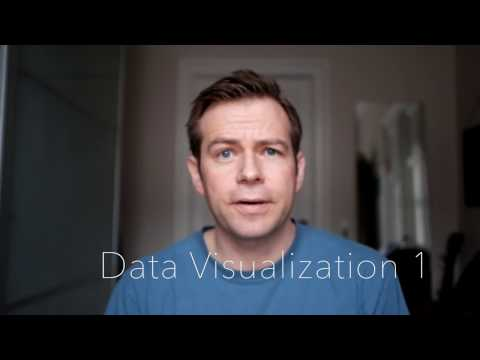

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('yiU56codNlI', width=800, height=450)

> *Exercise 4.1:* Questions for the lecture. 
>
> * You already computed Pearson correlations for four very different datasets in Exercise 3.1. Based on that experience, give a concrete example of when Pearson correlation is misleading. Write down the mathematical formulation of the Pearson correlation and explain in your own words how it works.
> * What is the difference between a bar-chart and a histogram? Can you think of a case where using one when you should use the other would lead to a wrong conclusion?
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. Then test it empirically: pick one of your crime distributions from Week 2 (e.g., time-of-day for a focus crime) and plot it as a histogram with 5, 25, and 200 bins. How does the apparent story change? Which bin count do you think is most honest?

<div class="alert alert-block alert-info">
Answer in your own words based on the video, <b>don't use your LLM</b>. Once you've written down your answers, it's OK to use the LLM to get better. 
</div>

## Part 5: Working with 1-dimensional data

Now it's time to go deeper with visualization. We are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It's pretty old, but I think it's a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first chapters. Today, we'll read chapter 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **Teams** and have a look under the `Shared` tab. The path is `/Documents/General/DAOST_chapter2.pdf`.

> *Exercise 5.1:* Questions for DAOST 
> * Explain in your own words the point of the jitter plot.
> * Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words, **not using an LLM**).
> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't in this class. I didn't give a detailed explanation in the video, but now that works to our advantage: You get to figure it out by yourself: When can KDEs be misleading? (Hold on to your answer — you'll test it empirically in Exercise 5.2.)
> * I discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
> * What is a *Quantile plot*? What is it good for. 
> * How is a *Probability plot* defined? What is it useful for? Have you ever seen one before?
> * One of the reasons I like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better (Hint: Think back on Anscombe's Quartet). 
> * I love box plots ❤️ When are box plots most useful?
> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?
> * Have you heard of [raincloud plots](https://wellcomeopenresearch.org/articles/4-63) or [beeswarm plots](https://python-graph-gallery.com/beeswarm/)? Look one of them up. What problem do they solve that violin plots don't?
> * Remember the box-plot part [from the DataSaurus video](https://www.youtube.com/watch?v=DbJyPELmhJc) (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin/bee-swarm/raincloud-plots help with that issue?

<div class="alert alert-block alert-info">
Answer without the help of your LLM and your goal is to learn from reading the text. but feel free to add more nuance by asking it questions.
</div>

> *Exercise 5.2:* Recreating plots from DAOST using SF crime data — Part 1
>
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.
>   * What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?
> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting.
>   * Now try the same thing with longitude. Does the pattern look different? Why might the latitude and longitude distributions have different shapes for the same crime type? (Think about SF's geography — ocean on the west, bay on the east, hills in between.)
> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll find a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). Or ask your LLM what it recommends.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?
> * Try varying the bandwidth parameter of your KDE (e.g., make it 3x smaller and 3x larger than the default). How does the plot change? Which is more dangerous for drawing conclusions — a bandwidth that's too small (overfitting) or too large (oversmoothing)?

<div class="alert alert-block alert-info">
For Exercises 5.2 and 5.3, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask your LLM for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc. 
</div>

Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 

> *Exercise 5.3:* Recreating plots from DAOST using SF crime data — Part 2
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. It is not easy to create this plot from scratch.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function.
>   * What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Why might the latitude distribution of crimes deviate from normal — what does the deviation tell you about the geography of crime in SF?
> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from your Personal Focus Crimes (from Week 2).
>   * For the full time-span of the data, calculate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and-whiskers plot showing the mean, median, quantiles, etc for all the different Personal Focus Crimes side-by-side. There are many ways to do this. I like to use [matplotlib's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!
>   * What does this plot reveal that you can't see in the plots from last time?
>   * Do you see outlier days? Pick one or two and look up what date they correspond to. Can you explain what happened? (Think: holidays, major events, reporting anomalies.)
> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plots have quite a different interpretation than the ones we created in the previous exercise. Cool, right?
> * For crimes that peak late at night, does the box plot do a good job of showing the "typical" time? What goes wrong when the distribution wraps around midnight (e.g., a crime that peaks between 11pm and 1am)? Can you think of a way to handle this?

---

## You've Completed Week 3!

This week you went deeper into both data analysis and visualization theory. You now have:

- Experience with conditional plots — comparing crime profiles across districts and over time
- A deeper understanding (via Anscombe's quartet) of why you should always plot your data
- Familiarity with a range of visualization types: jitter plots, histograms, KDEs, probability plots, box plots, and violin plots
- A foundation in visualization theory from the lectures and DAOST Chapter 2

**Key takeaways:**
- Summary statistics can hide important structure in data. Always visualize.
- Conditional probabilities (like `P(crime|district)/P(crime)`) are a simple but powerful tool for finding patterns.
- Crime patterns aren't static — neighborhoods change, and models trained on old data can become misleading.
- Different plot types reveal different aspects of the same data. Choosing the right one matters.

If you want to go further:
- Try creating violin or swarm plots as alternatives to the box plots from Exercise 5.3 — do they reveal anything the box plots missed?
- Explore whether the time-of-day patterns differ between districts (combining the ideas from Parts 2 and 5)